In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_absolute_error

In [35]:
import yfinance as yf

# Di notebook ini kita coba pakai saham BBRI untuk contoh
# Tapi di web yang sudah dideploy, user bisa memilih saham yang diinginkan
ticker_symbol = 'BBRI.JK'

ticker_data = yf.Ticker(ticker_symbol)

ticker_df = ticker_data.history(period='1d', start='2019-1-1')

ticker_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-01 00:00:00+07:00,3033.385986,3033.385986,3033.385986,3033.385986,0,0.0,0.0
2019-01-02 00:00:00+07:00,2991.946289,3016.810109,2975.370409,2991.946289,74945100,0.0,0.0
2019-01-03 00:00:00+07:00,2967.082614,3016.810256,2967.082614,3000.234375,93458300,0.0,0.0
2019-01-04 00:00:00+07:00,3000.234227,3033.385986,2991.946287,3033.385986,114459600,0.0,0.0
2019-01-07 00:00:00+07:00,3066.537746,3074.825686,3033.385986,3033.385986,74641100,0.0,0.0


In [36]:
ticker_df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-12-18 00:00:00+07:00,5575.0,5575.0,5500.0,5500.0,102780900,0.0,0.0
2023-12-19 00:00:00+07:00,5450.0,5550.0,5450.0,5550.0,135207300,0.0,0.0
2023-12-20 00:00:00+07:00,5700.0,5700.0,5550.0,5550.0,138470900,0.0,0.0
2023-12-21 00:00:00+07:00,5550.0,5600.0,5525.0,5575.0,99049600,0.0,0.0
2023-12-22 00:00:00+07:00,5650.0,5700.0,5600.0,5675.0,109411300,0.0,0.0


In [37]:
print('Nama saham:', ticker_data.info['longName'])
print('Data updated until:', ticker_df.index[-1].strftime('%d %B %Y'))

Nama saham: PT Bank Rakyat Indonesia (Persero) Tbk
Data updated until: 22 December 2023


In [49]:
ticker_df.to_csv('example_scraping_result.csv')

In [38]:
stock_data = ticker_df.copy()

In [39]:
stock_data.columns = map(str.lower, stock_data.columns)
stock_data.index.name = stock_data.index.name.lower()

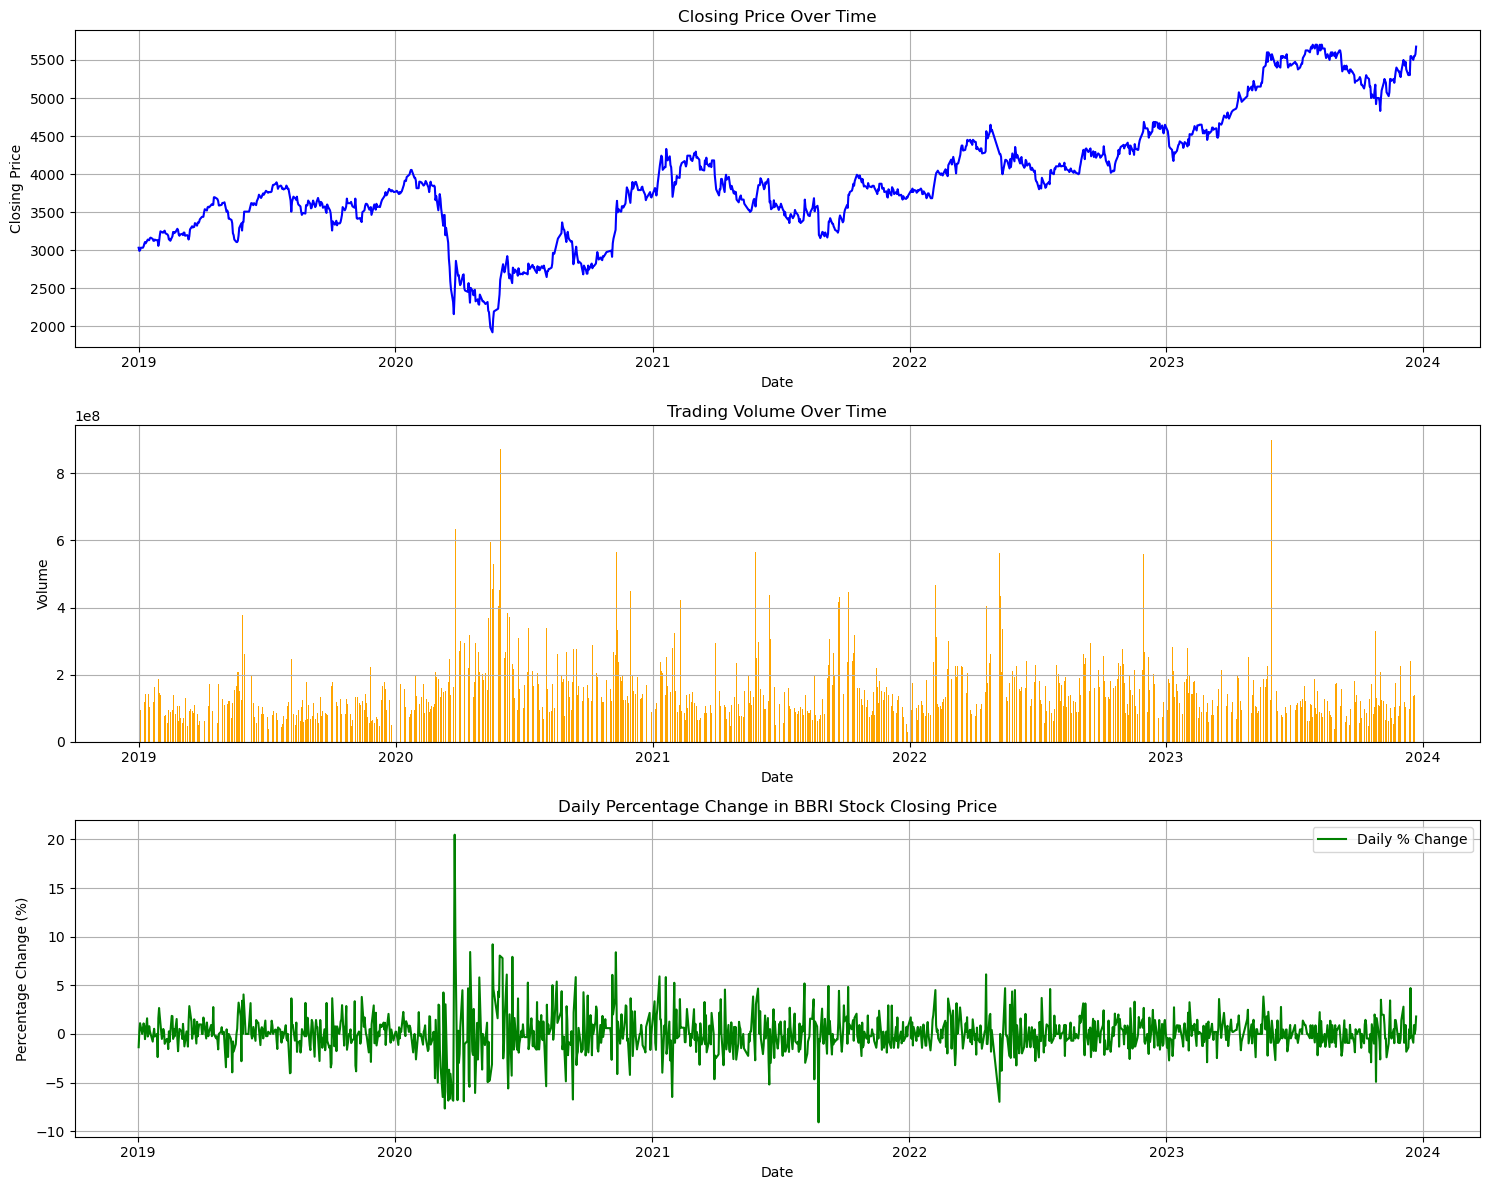

In [52]:
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.plot(stock_data.index, stock_data['close'], color='blue')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.bar(stock_data.index, stock_data['volume'], color='orange')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)

plt.subplot(3, 1, 3)
stock_data['daily change'] = stock_data['close'].pct_change() * 100
plt.plot(stock_data['daily change'], label='Daily % Change', color='green')
plt.title('Daily Percentage Change in BBRI Stock Closing Price')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

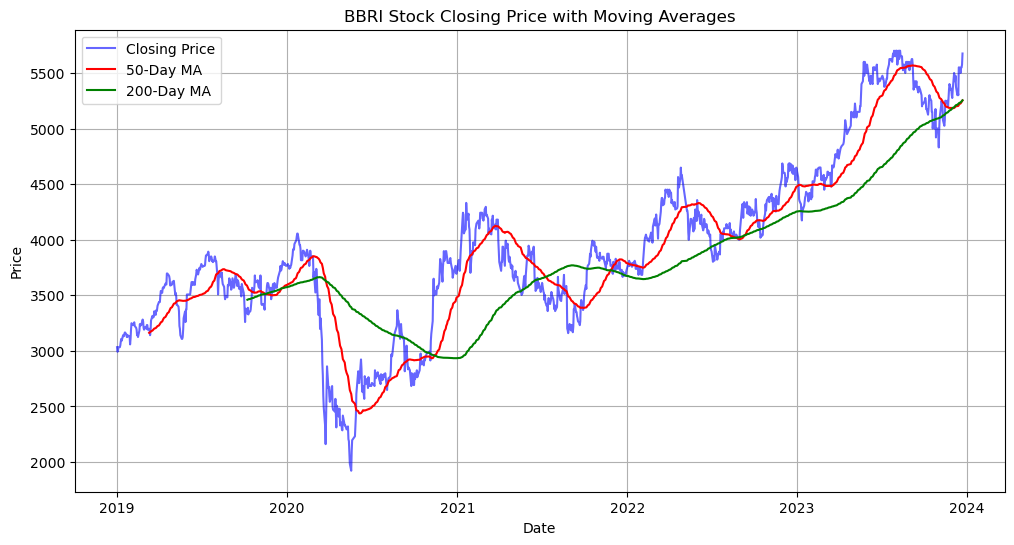

In [53]:
stock_data['MA50'] = stock_data['close'].rolling(window=50).mean()
stock_data['MA200'] = stock_data['close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(stock_data['close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(stock_data['MA50'], label='50-Day MA', color='red')
plt.plot(stock_data['MA200'], label='200-Day MA', color='green')
plt.title('BBRI Stock Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

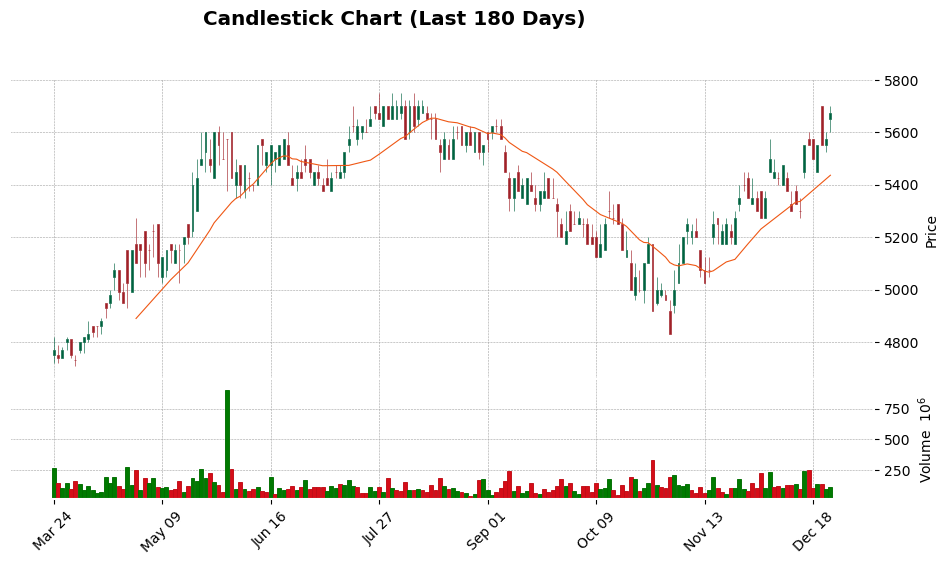

In [17]:
import mplfinance as mpf

subset_data = stock_data[-180:]  # last 180 days

mpf.plot(subset_data, type='candle', style='charles', title='Candlestick Chart (Last 180 Days)', volume=True, mav=(20), figsize=(12, 6), show_nontrading=False)

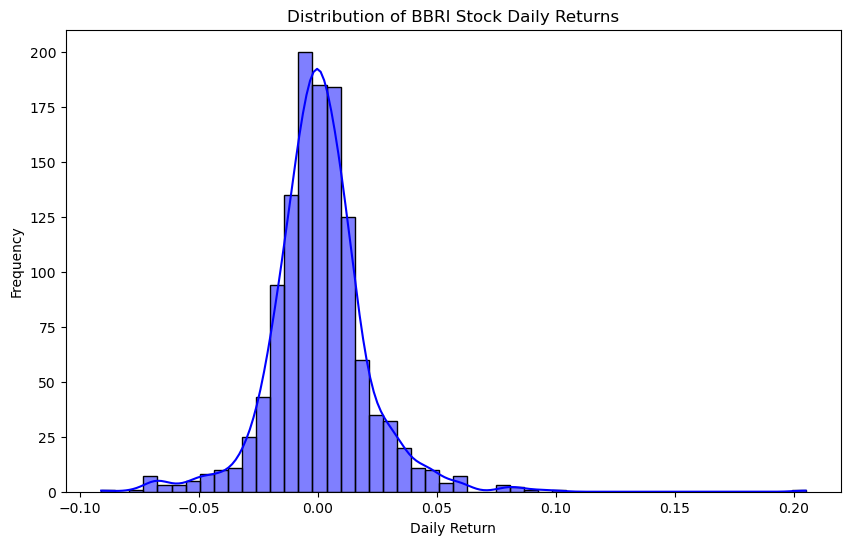

In [54]:
daily_returns = stock_data['close'].pct_change()

plt.figure(figsize=(10, 6))
sns.histplot(daily_returns, bins=50, kde=True, color='blue')
plt.title('Distribution of BBRI Stock Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

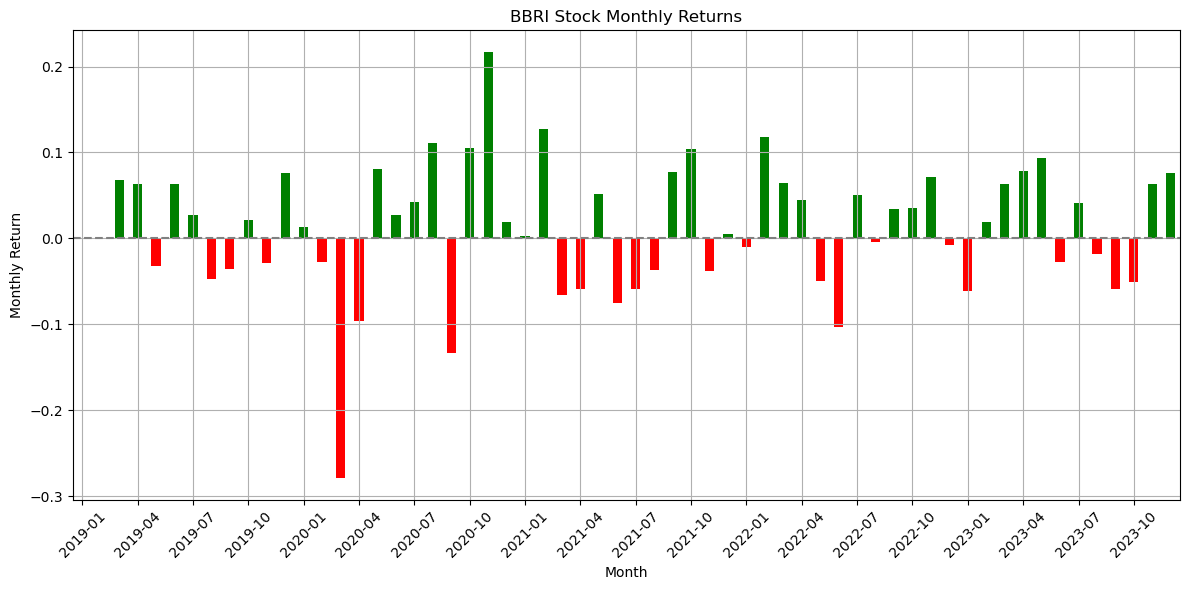

In [55]:
monthly_returns = stock_data['close'].resample('M').ffill().pct_change()

bar_colors = ['red' if x < 0 else 'green' for x in monthly_returns]

monthly_returns.index = monthly_returns.index.strftime('%Y-%m')

label_indices = range(0, len(monthly_returns), 3)

plt.figure(figsize=(12, 6))
monthly_returns.plot(kind='bar', color=bar_colors)
plt.title('BBRI Stock Monthly Returns')
plt.xlabel('Month')
plt.ylabel('Monthly Return')
plt.xticks(ticks=label_indices, labels=[monthly_returns.index[i] for i in label_indices], rotation=45)
plt.axhline(y=0, color='gray', linestyle='--')
plt.tight_layout()
plt.grid(True)
plt.show()

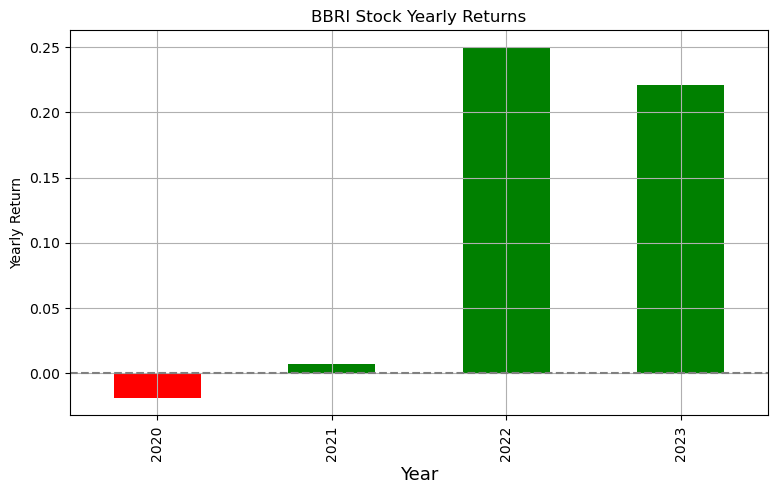

In [56]:
yearly_returns = stock_data['close'].resample('Y').ffill().pct_change()
yearly_returns = yearly_returns.dropna()

bar_colors = ['red' if x < 0 else 'green' for x in yearly_returns]

yearly_returns.index = yearly_returns.index.strftime('%Y')

plt.figure(figsize=(9, 5))
yearly_returns.plot(kind='bar', color=bar_colors)
plt.title('BBRI Stock Yearly Returns')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Yearly Return')
plt.axhline(y=0, color='gray', linestyle='--')
plt.grid(True)
plt.show()

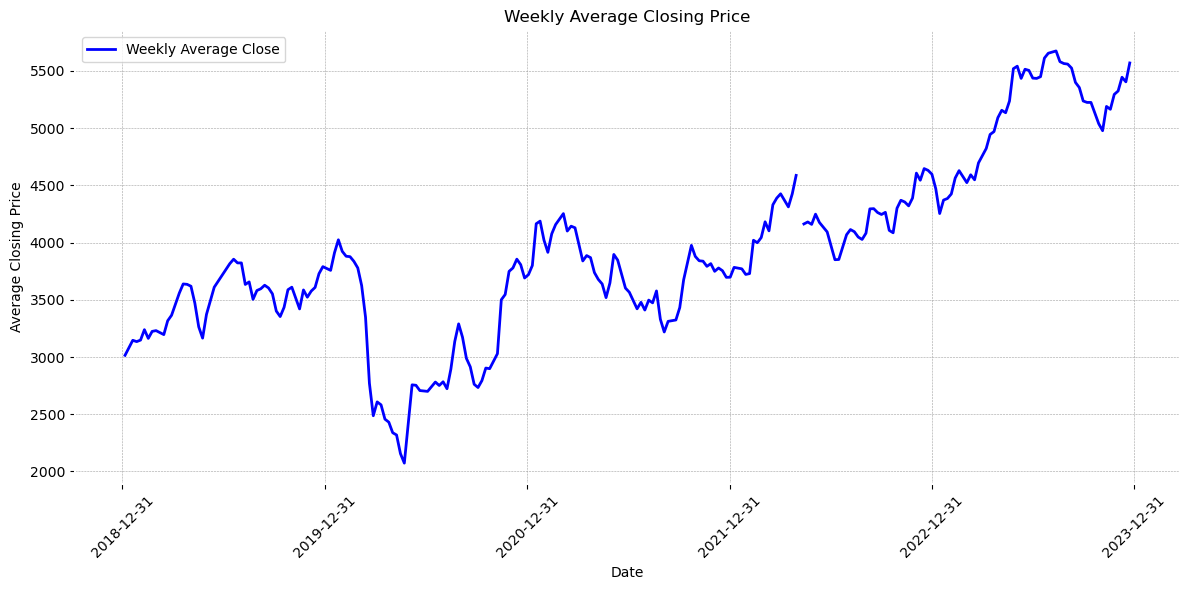

In [40]:
import matplotlib.dates as mdates

weekly_data = stock_data['close'].resample('W').mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_data, label='Weekly Average Close', color='blue')
plt.title('Weekly Average Closing Price')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.legend()
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

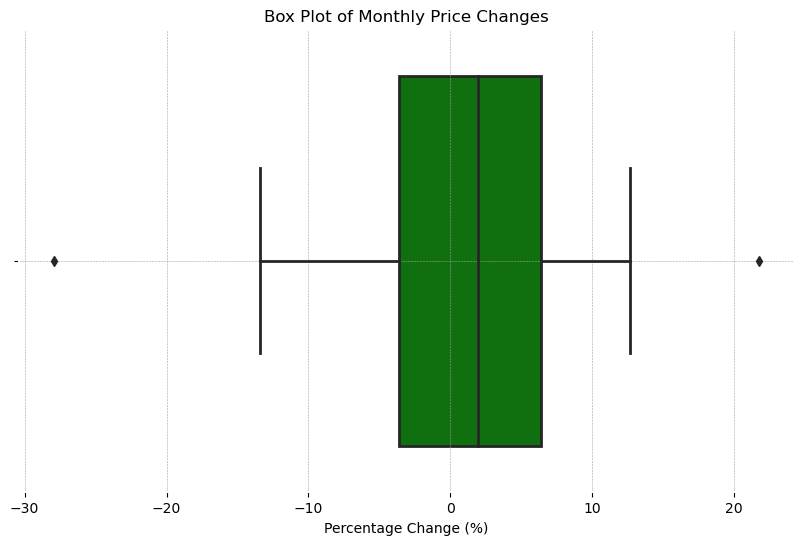

In [42]:
monthly_change_data = stock_data['close'].resample('M').last().pct_change() * 100

plt.figure(figsize=(10, 6))
sns.boxplot(x=monthly_change_data.dropna(), color='green')
plt.title('Box Plot of Monthly Price Changes')
plt.xlabel('Percentage Change (%)')
plt.grid(True)
plt.show()

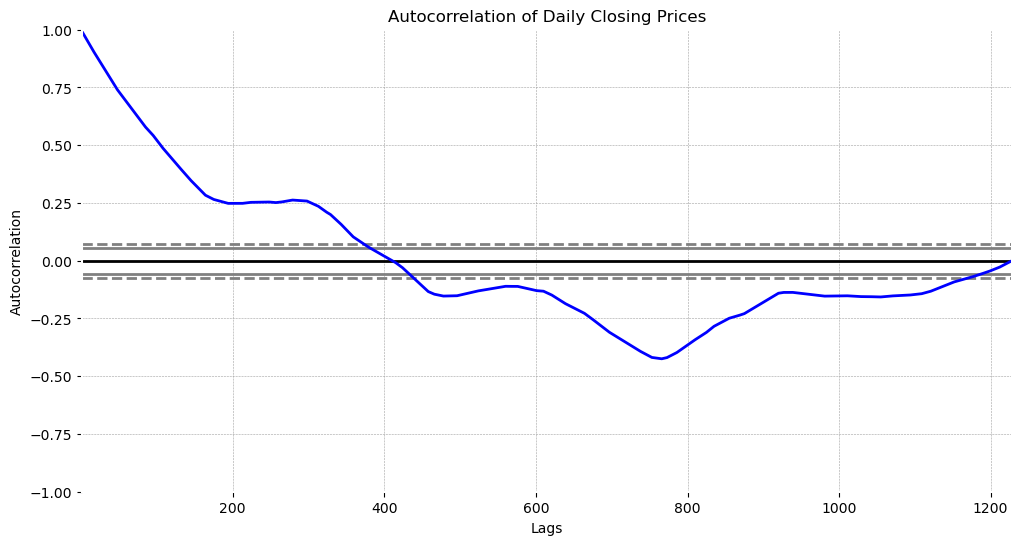

In [44]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(12, 6))
autocorrelation_plot(stock_data['close'], color='blue')
plt.title('Autocorrelation of Daily Closing Prices')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

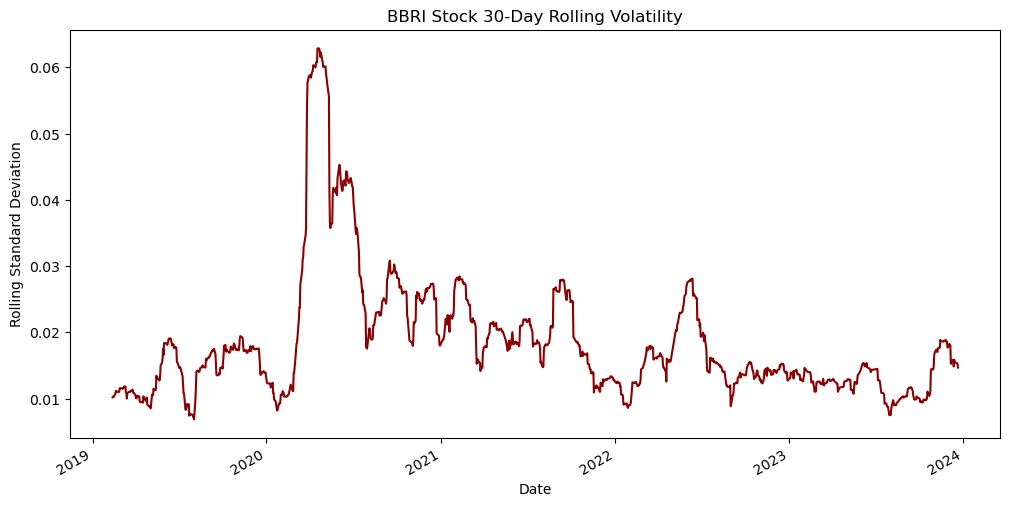

In [57]:
rolling_volatility = daily_returns.rolling(window=30).std()

plt.figure(figsize=(12, 6))
rolling_volatility.plot(color='darkred')
plt.title('BBRI Stock 30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Rolling Standard Deviation')
plt.show()

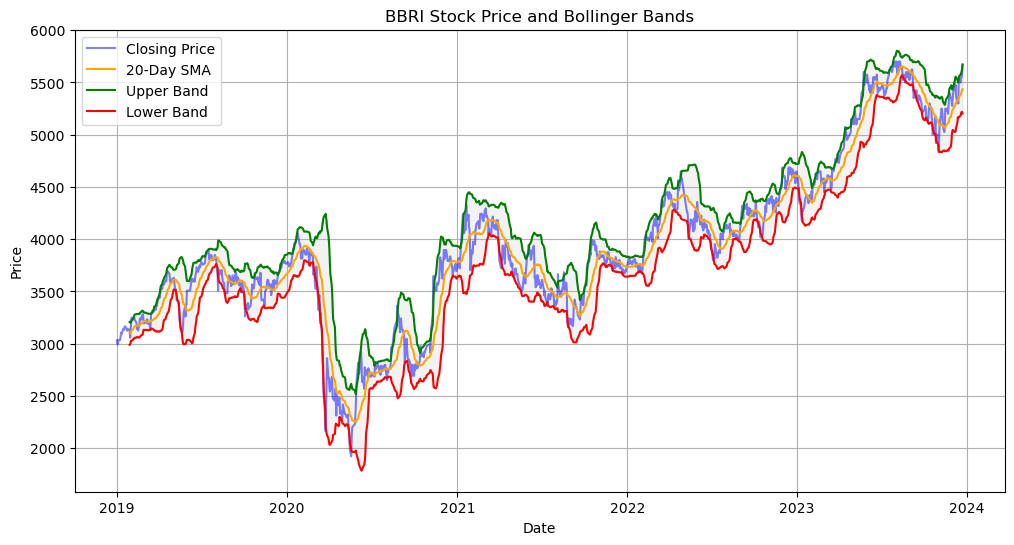

In [58]:
stock_data['SMA20'] = stock_data['close'].rolling(window=20).mean()  # 20-day Simple Moving Average
stock_data['Upper Band'] = stock_data['SMA20'] + (stock_data['close'].rolling(window=20).std() * 2)
stock_data['Lower Band'] = stock_data['SMA20'] - (stock_data['close'].rolling(window=20).std() * 2)

plt.figure(figsize=(12, 6))
plt.plot(stock_data['close'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(stock_data['SMA20'], label='20-Day SMA', color='orange')
plt.plot(stock_data['Upper Band'], label='Upper Band', color='green')
plt.plot(stock_data['Lower Band'], label='Lower Band', color='red')
plt.fill_between(stock_data.index, stock_data['Upper Band'], stock_data['Lower Band'], color='gray', alpha=0.1)
plt.title('BBRI Stock Price and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

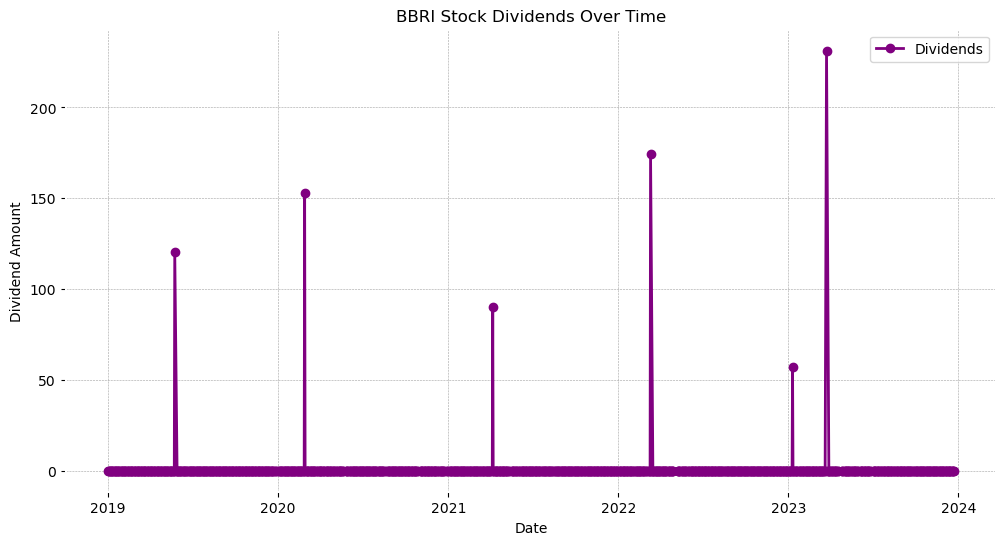

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['dividends'], label='Dividends', color='purple', marker='o')
plt.title('Stock Dividends Over Time')
plt.xlabel('Date')
plt.ylabel('Dividend Amount')
plt.legend()
plt.show()

In [59]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = stock_data[['close']].copy()

missing_values = data.isnull().sum()

scaler = MinMaxScaler(feature_range=(0, 1))
data['close'] = scaler.fit_transform(data[['close']])

missing_values, data.head()

(close    0
 dtype: int64,
                               close
 date                               
 2019-01-01 00:00:00+07:00  0.294169
 2019-01-02 00:00:00+07:00  0.283200
 2019-01-03 00:00:00+07:00  0.285394
 2019-01-04 00:00:00+07:00  0.294169
 2019-01-07 00:00:00+07:00  0.294169)

In [60]:
def create_dataset(dataset, look_back=1):
    """
    Convert an array of values into a dataset matrix for time series forecasting
    """
    X, Y = [], []
    for i in range(len(dataset) - look_back + 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        if (i < (len(dataset) - look_back)):
            Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

close_prices = data['close'].values.reshape(-1, 1)

look_back = 60

X, Y = create_dataset(close_prices, look_back)

train_size = int(len(X) * 0.8)

trainX, testX = X[0:train_size], X[train_size:]
trainY, testY = Y[0:train_size], Y[train_size:]

trainX.shape, trainY.shape, testX.shape, testY.shape

((935, 60), (935,), (234, 60), (233,))

In [61]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
import tensorflow as tf

np.random.seed(92)
tf.random.set_seed(92)

# Model architecture
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1))) 
model.add(Dense(1))  

model.compile(loss='mean_squared_error', optimizer=Adam(0.001))

In [62]:
history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(testX[:-1], testY), verbose=1)

Epoch 1/100
30/30 [==============================] - 2s 26ms/step - loss: 0.0520 - val_loss: 0.0465
Epoch 2/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0038 - val_loss: 0.0149
Epoch 3/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0027 - val_loss: 0.0063
Epoch 4/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0023 - val_loss: 0.0032
Epoch 5/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 6/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 7/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 8/100
30/30 [==============================] - 0s 9ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 9/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 10/100
30/30 [==============================] - 0s 8ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 11

In [63]:
from sklearn.metrics import mean_squared_error
import numpy as np

test_predictions = model.predict(testX[:-1])

test_predictions_inverse = scaler.inverse_transform(test_predictions)
testY_inverse = scaler.inverse_transform([testY])

8/8 [==============================] - 0s 3ms/step


In [64]:
mae = mean_absolute_error(testY_inverse[0], test_predictions_inverse[:,0])
print(f"Mean Absolute Error (MAE): {mae}")

r2 = r2_score(testY_inverse[0], test_predictions_inverse[:,0])
print(f"R-squared (R2 ): {r2}")

mse = mean_squared_error(testY_inverse[0], test_predictions_inverse[:, 0])
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 63.25531032054721
R-squared (R2 ): 0.9634744550440837
Mean Squared Error (MSE): 6384.119501306263
Root Mean Squared Error (RMSE): 79.90068523677543


In [65]:
original_length = 202
desired_length = 262

additional_values = np.empty(desired_length - original_length)
additional_values[:] = np.nan

additional_values = additional_values.reshape(-1, 1)

resulting_array = np.concatenate((additional_values, test_predictions_inverse))

In [66]:
data = stock_data[['close']].copy()

train = data[:train_size]
valid = data[train_size:]
valid['Predictions'] = resulting_array

train.shape, valid.shape, resulting_array.shape

C:\Users\Nando\AppData\Local\Temp\ipykernel_15552\730014755.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = resulting_array


((935, 1), (293, 2), (293, 1))

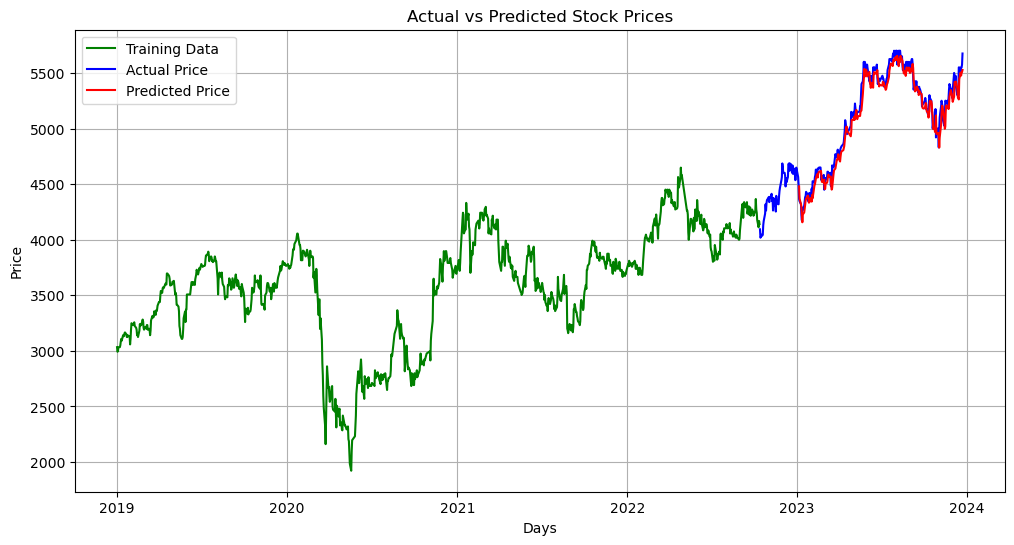

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(train['close'], label='Training Data', color='green')
plt.plot(valid['close'], label='Actual Price', color='blue')
plt.plot(valid['Predictions'], label='Predicted Price', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid()
plt.legend()
plt.show()

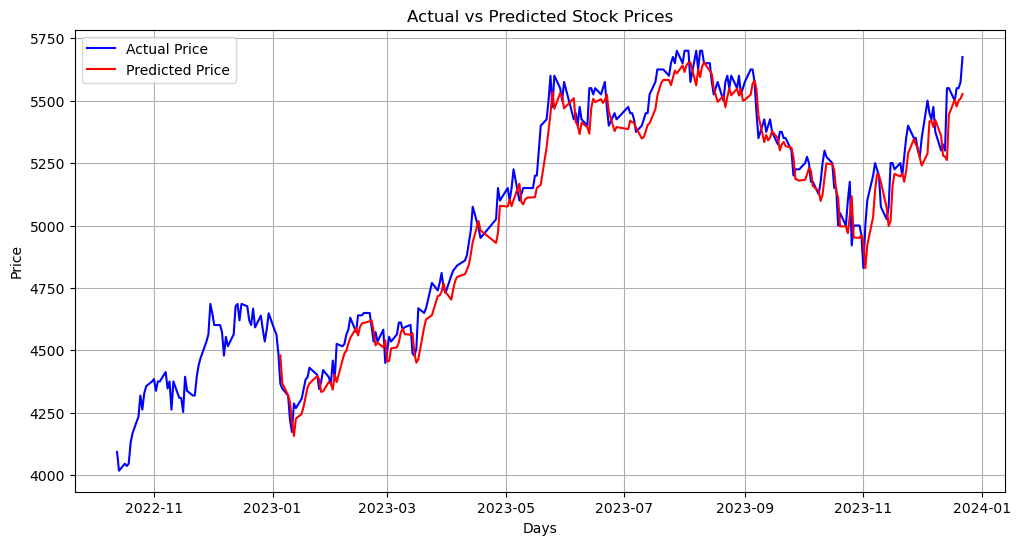

In [68]:
# Create a time series plot
plt.figure(figsize=(12, 6))
plt.plot(valid['close'], label='Actual Price', color='blue')
plt.plot(valid['Predictions'], label='Predicted Price', color='red')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid()
plt.legend()
plt.show()

In [69]:
last_data_point = testX[-1].reshape(1, look_back, 1)

predicted_price = model.predict(last_data_point)

predicted_price = scaler.inverse_transform(predicted_price)
predicted_price

1/1 [==============================] - 0s 266ms/step


array([[5604.7266]], dtype=float32)

In [70]:
def make_rolling_predictions(model, last_data_point, scaler, days):
    predictions = []

    current_batch = last_data_point
    for i in range(days):
        current_pred = model.predict(current_batch)[0]
        
        predictions.append(current_pred)
        
        current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

    original_scale_predictions = scaler.inverse_transform(predictions)
    return original_scale_predictions

last_data_point = testX[-1].reshape(1, look_back, 1)

predicted_prices = make_rolling_predictions(model, last_data_point, scaler, days=5)

for i, price in enumerate(predicted_prices, 1):
    print(f"Predicted closing price for day {i}: {price[0]}")

1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 15ms/step
Predicted closing price for day 1: 5604.726462150284
Predicted closing price for day 2: 5576.0063623668975
Predicted closing price for day 3: 5540.765129059699
Predicted closing price for day 4: 5505.140180447255
Predicted closing price for day 5: 5468.725282720494
